# Final Project
## by Gadelshin Egor 202001124

### The dataset contains a bunch of variables on the global education. Using it I am aiming to answer the following questions:
#### 1) How do education levels vary across different countries?
#### 2) Is there a significant difference in gender literacy levels globally?
#### 3) Is there a correlation between the levels of education and literacy rates across different countries?

### 01. Data import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Global_Education.csv', encoding='latin-1') # erasing encoding leads to processing errors; make sure to have both files in the same directory
df.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


### 02. Preprocessing and chiecking the data

In [2]:
df.shape

(202, 29)

In [3]:
df.columns

Index(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Edu

In [4]:
df.describe()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,55.166928,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,16.813639,45.976287,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


Text(0.5, 1.0, 'Missing values in the dataset')

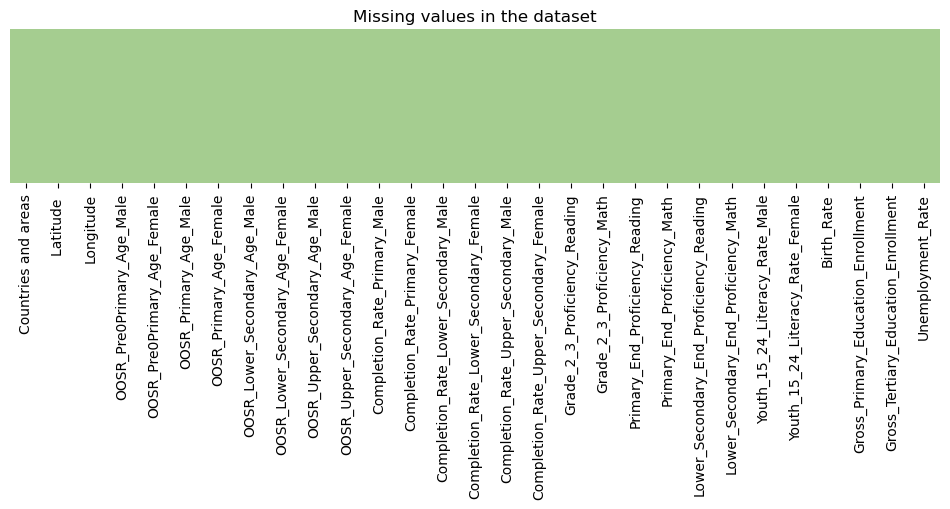

In [5]:
# Looking for missing values
plt.figure(figsize=(12,2))
sns.heatmap(df.isnull(), cbar=False, cmap='crest', yticklabels=False)
plt.title('Missing values in the dataset') #There are no missing values, but I can see a lot of zeros in certain categories, which we need to take care of

#### Since the dataset does not have missing values we can go on analysing the data

### 03. Questions

#### 03.1. How do education levels vary across different countries?

In [6]:
#First, let us merge some columns (for male and female) into 1
df['Completion_Rate_Primary'] = df[['Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female']].mean(axis=1)
df['Completion_Rate_Lower_Secondary'] = df[['Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female']].mean(axis=1)
df['Completion_Rate_Upper_Secondary'] = df[['Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female']].mean(axis=1)

In [7]:
#Manage the zeros
df1 = df[df['Completion_Rate_Primary'] != 0]

In [8]:
#First, let us use groupby() and choose the needed variables
grouped1 = df1.groupby(['Countries and areas'])[['Completion_Rate_Primary',
       'Completion_Rate_Lower_Secondary',
       'Completion_Rate_Upper_Secondary']]
grouped1.apply(lambda a: a[:]) #to show the table properly (applying print looks bad)

,,Completion_Rate_Primary,Completion_Rate_Lower_Secondary,Completion_Rate_Upper_Secondary
Countries and areas,,,,
Afghanistan,0,53.5,37.5,23.0
Albania,1,95.0,97.5,78.0
Algeria,2,93.0,57.0,29.5
Angola,4,60.0,37.0,19.5
Argentina,7,92.5,74.5,49.5
...,...,...,...,...
Uruguay,194,97.0,69.5,38.5
Vietnam,198,96.5,84.0,55.5
Yemen,199,62.5,47.0,30.0


In [9]:
#Now let us see the basic statistical information of those variables
df1[['Completion_Rate_Primary',
       'Completion_Rate_Lower_Secondary',
       'Completion_Rate_Upper_Secondary']].describe()

,Completion_Rate_Primary,Completion_Rate_Lower_Secondary,Completion_Rate_Upper_Secondary
count,107.000000,107.000000,107.000000
mean,79.149533,62.210280,43.186916
std,21.475657,27.881406,27.458161
min,24.500000,7.000000,2.500000
25%,64.500000,42.000000,19.750000
50%,85.000000,62.500000,36.000000
75%,97.000000,88.250000,65.250000
max,100.000000,100.000000,100.000000


[Text(0, 0, 'Afghanistan'),
 Text(1, 0, 'Albania'),
 Text(2, 0, 'Algeria'),
 Text(3, 0, 'Angola'),
 Text(4, 0, 'Argentina'),
 Text(5, 0, 'Armenia'),
 Text(6, 0, 'Bangladesh'),
 Text(7, 0, 'Barbados'),
 Text(8, 0, 'Belarus'),
 Text(9, 0, 'Belize'),
 Text(10, 0, 'Benin'),
 Text(11, 0, 'Bhutan'),
 Text(12, 0, 'Bosnia and Herzegovina'),
 Text(13, 0, 'Botswana'),
 Text(14, 0, 'Brazil'),
 Text(15, 0, 'Burkina Faso'),
 Text(16, 0, 'Burundi'),
 Text(17, 0, 'Cambodia'),
 Text(18, 0, 'Cameroon'),
 Text(19, 0, 'Central African Republic'),
 Text(20, 0, 'Chad'),
 Text(21, 0, 'Chile'),
 Text(22, 0, 'China'),
 Text(23, 0, 'Colombia'),
 Text(24, 0, 'Comoros'),
 Text(25, 0, 'Republic of the Congo'),
 Text(26, 0, 'Costa Rica'),
 Text(27, 0, 'Ivory Coast'),
 Text(28, 0, 'Cuba'),
 Text(29, 0, 'North Korea'),
 Text(30, 0, 'Democratic Republic of the Congo'),
 Text(31, 0, 'Dominican Republic'),
 Text(32, 0, 'Ecuador'),
 Text(33, 0, 'Egypt'),
 Text(34, 0, 'El Salvador'),
 Text(35, 0, 'Eswatini'),
 Text(36, 0

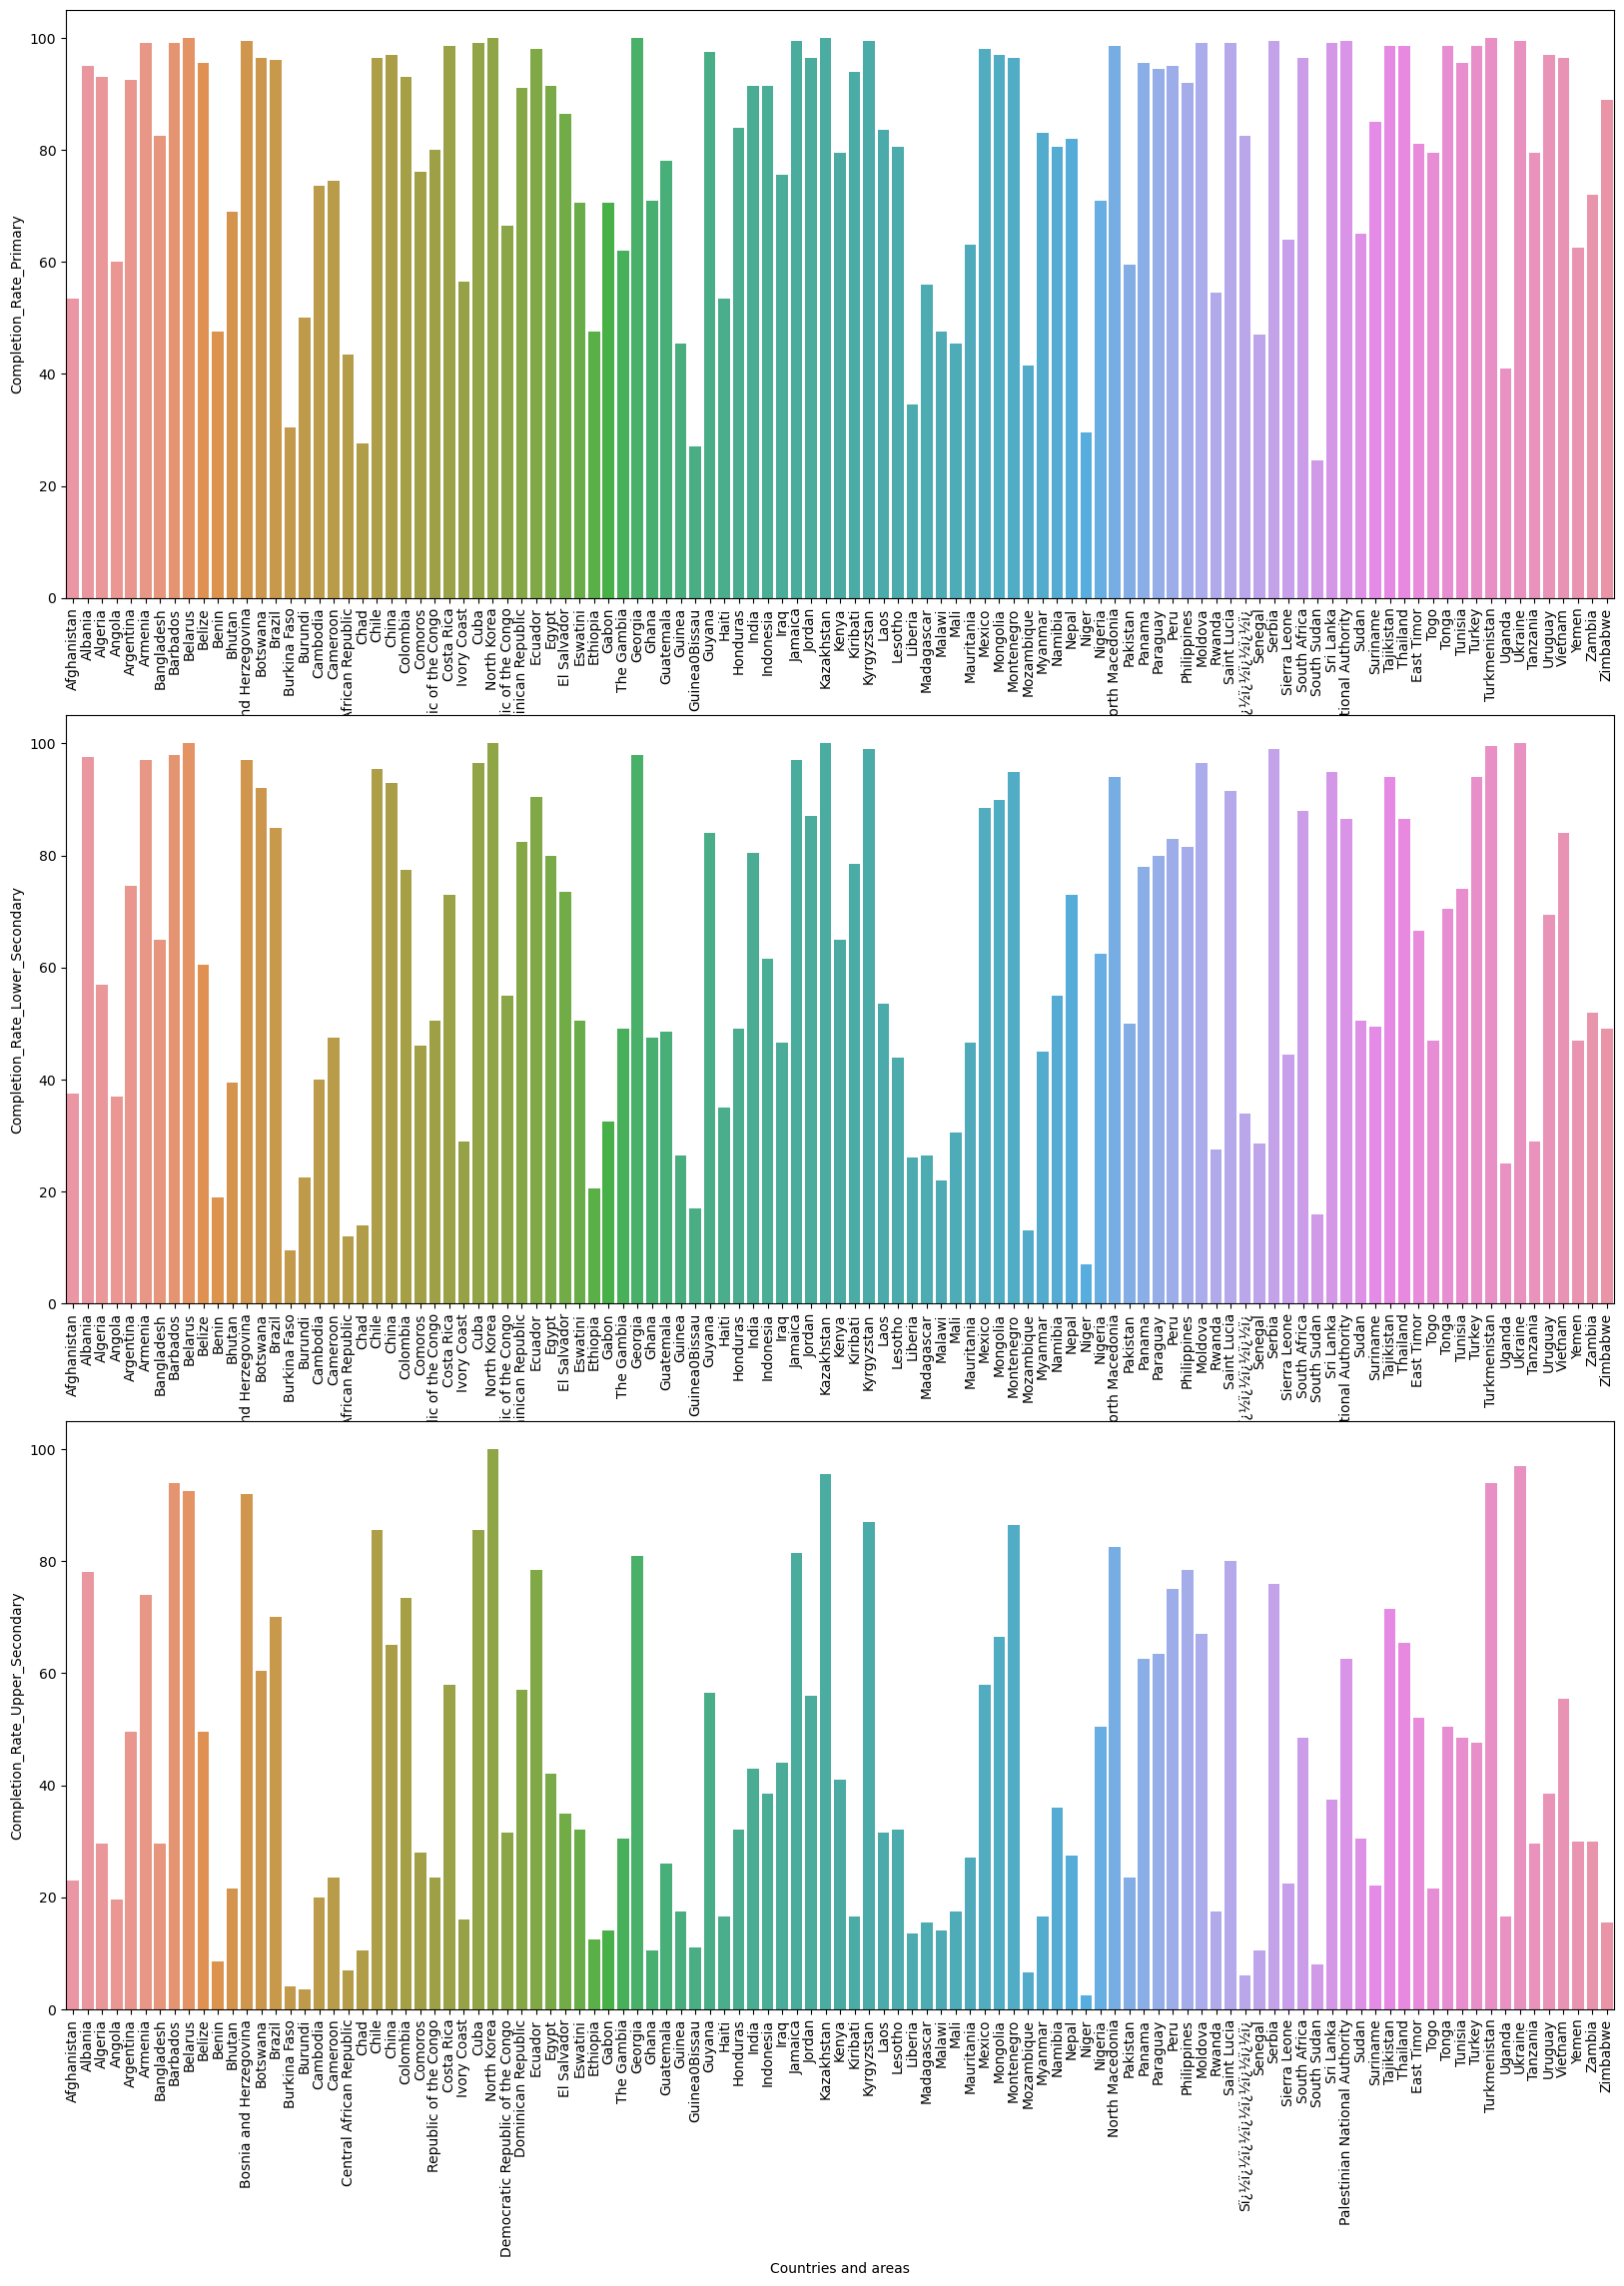

In [10]:
# now let us visualise using the chart
plt.figure(figsize=(20,26))
plt.subplot(3,1,1)
p1 = sns.barplot(df1, x = 'Countries and areas', y = 'Completion_Rate_Primary')
p1.set_xticklabels(p1.get_xticklabels(), rotation=90)

plt.subplot(3,1,2)
p2 = sns.barplot(df1, x = 'Countries and areas', y = 'Completion_Rate_Lower_Secondary')
p2.set_xticklabels(p2.get_xticklabels(), rotation=90)

plt.subplot(3,1,3)
p3 = sns.barplot(df1, x = 'Countries and areas', y = 'Completion_Rate_Upper_Secondary')
p3.set_xticklabels(p3.get_xticklabels(), rotation=90)

#### As we can see, the education levels are significantly varying froom country to country

#### 03.2. Is there a significant difference in gender literacy levels globally?

In [11]:
#1) Manage zeros and group the data
df2 = df[df['Youth_15_24_Literacy_Rate_Male'] != 0]
grouped2 = df2.groupby(['Countries and areas'])[['Youth_15_24_Literacy_Rate_Male','Youth_15_24_Literacy_Rate_Female']]
grouped2.apply(lambda a: a[:]) #to show the table properly (applying print looks bad)

,,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female
Countries and areas,,,
Afghanistan,0,74,56
Albania,1,99,100
Algeria,2,98,97
Argentina,7,99,100
Bahrain,13,100,99
...,...,...,...
Uruguay,194,99,99
Uzbekistan,195,100,100
Vanuatu,196,96,97


In [12]:
#Now let us see the basic statistical information of those variables
df2[['Youth_15_24_Literacy_Rate_Male','Youth_15_24_Literacy_Rate_Female']].describe()

,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female
count,79.000000,79.000000
mean,91.544304,89.708861
std,13.221774,17.696988
min,48.000000,29.000000
25%,88.500000,90.000000
50%,98.000000,99.000000
75%,99.000000,100.000000
max,100.000000,100.000000


<Axes: >

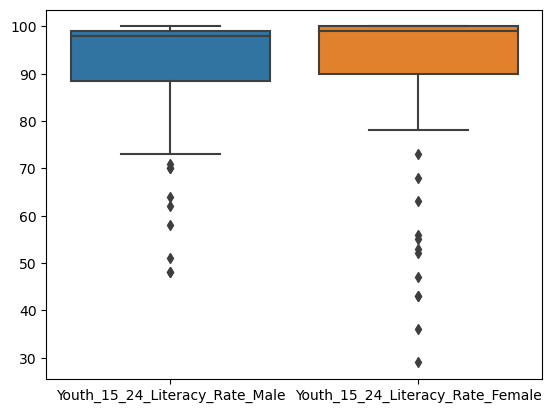

In [13]:
#Finally, let us visualise and see if there is a significant difference using the boxplot
sns.boxplot(df2[['Youth_15_24_Literacy_Rate_Male','Youth_15_24_Literacy_Rate_Female']])

#### The figure suggests that there is no significant difference among two of those categories, yet the Female group is facing much more outliers, which can be caused by the gender education inequality in some countries

#### 03.03. Is there a correlation between the levels of education and literacy rates across different countries?

In [14]:
#Again, let us merge the columns and get rid of zeros
df['Youth_15_24_Literacy_Rate'] = df[['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female']].mean(axis=1)
df3 = df[(df['Youth_15_24_Literacy_Rate'] != 0) & (df['Completion_Rate_Primary'] != 0)]

<Axes: >

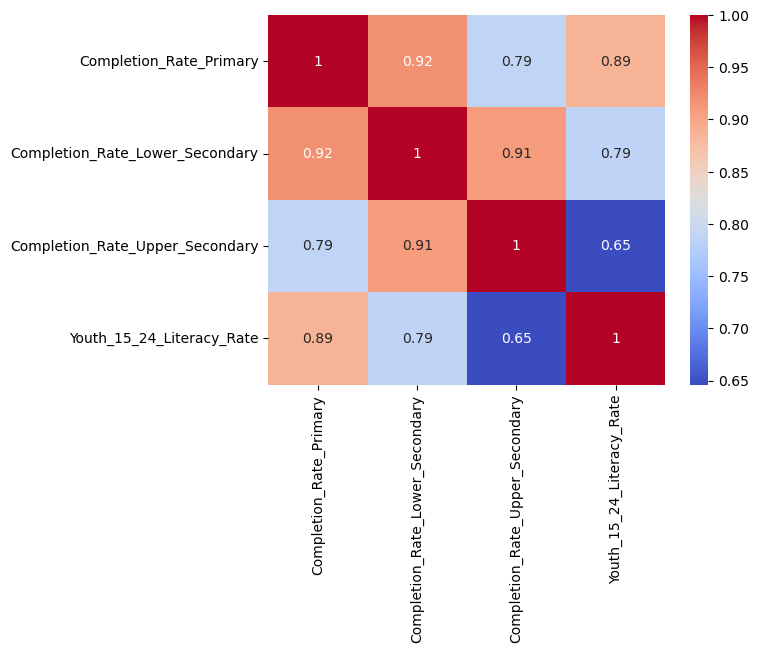

In [15]:
#Let us see the correlation
c = df3[['Completion_Rate_Primary',
       'Completion_Rate_Lower_Secondary',
       'Completion_Rate_Upper_Secondary',
       'Youth_15_24_Literacy_Rate']].corr()
sns.heatmap(c, cmap='coolwarm', annot=True)

#### The correlation suggests that there is no significant correlation between literacy level and the education level. More research is needed to explain this outcome

### Conclusion
#### Through this research we were able to see how education levels in counrties vary, see the difference in literacy level between genders globally, and find out there is no significant correlation between education level and literacy level (interestng outcome)

#### P.S. I was also able to develop my knowledge in Python Data Analysis by applying things we learnt in class. After the completion, I can say that I could find a better dataset, as this one is very poorly set up (zeros, separate variables for genders), and I think finding the raw data used for this dataset would work much better.